### Columns
* age in years
* sex(1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholesterol in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - has heart disease 1 or does't have disease 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_style("white")

In [5]:
df=pd.read_csv('heart.csv')
dfx=df #maintain original data

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Rename columns
df.rename(columns={
    'cp':'chest_pain',
    'trestbps' : 'resting_bp',
    'fbs': 'fasting_blood_sugar',
    'chol' : 'cholesterol',
    'restecg': 'resting_ecg',
    'thalach':'max_heart_rate',
    'exang':'exercise_angina',
    'ca':'num_major_vessels',
    'thal':'thalium_stress_test'
}, inplace=True)

In [10]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                    303 non-null int64
sex                    303 non-null int64
chest_pain             303 non-null int64
resting_bp             303 non-null int64
cholesterol            303 non-null int64
fasting_blood_sugar    303 non-null int64
resting_ecg            303 non-null int64
max_heart_rate         303 non-null int64
exercise_angina        303 non-null int64
oldpeak                303 non-null float64
slope                  303 non-null int64
num_major_vessels      303 non-null int64
thalium_stress_test    303 non-null int64
target                 303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


(None, (303, 14))

In [11]:
#check for nan values
df.isnull().sum()

age                    0
sex                    0
chest_pain             0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
slope                  0
num_major_vessels      0
thalium_stress_test    0
target                 0
dtype: int64

In [12]:
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thalium_stress_test,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# all the unique values of each attribute
for var in df:
    print(var,'\n',df[var].unique(),'\n')

age 
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

sex 
 [1 0] 

chest_pain 
 [3 2 1 0] 

resting_bp 
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

cholesterol 
 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 1

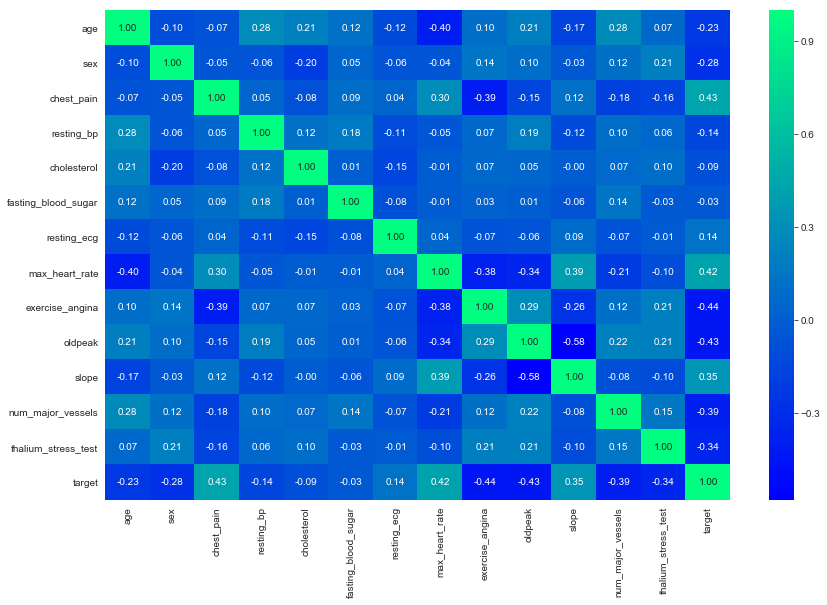

In [14]:
#Is there collinearity?
plt.figure(figsize=(14, 9))
sns.heatmap(data = df.corr(), cmap="winter", fmt=".2f", annot=True)

In [15]:
corrmat=df.corr()
corrmat

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thalium_stress_test,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
resting_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


*  no collineraity detected

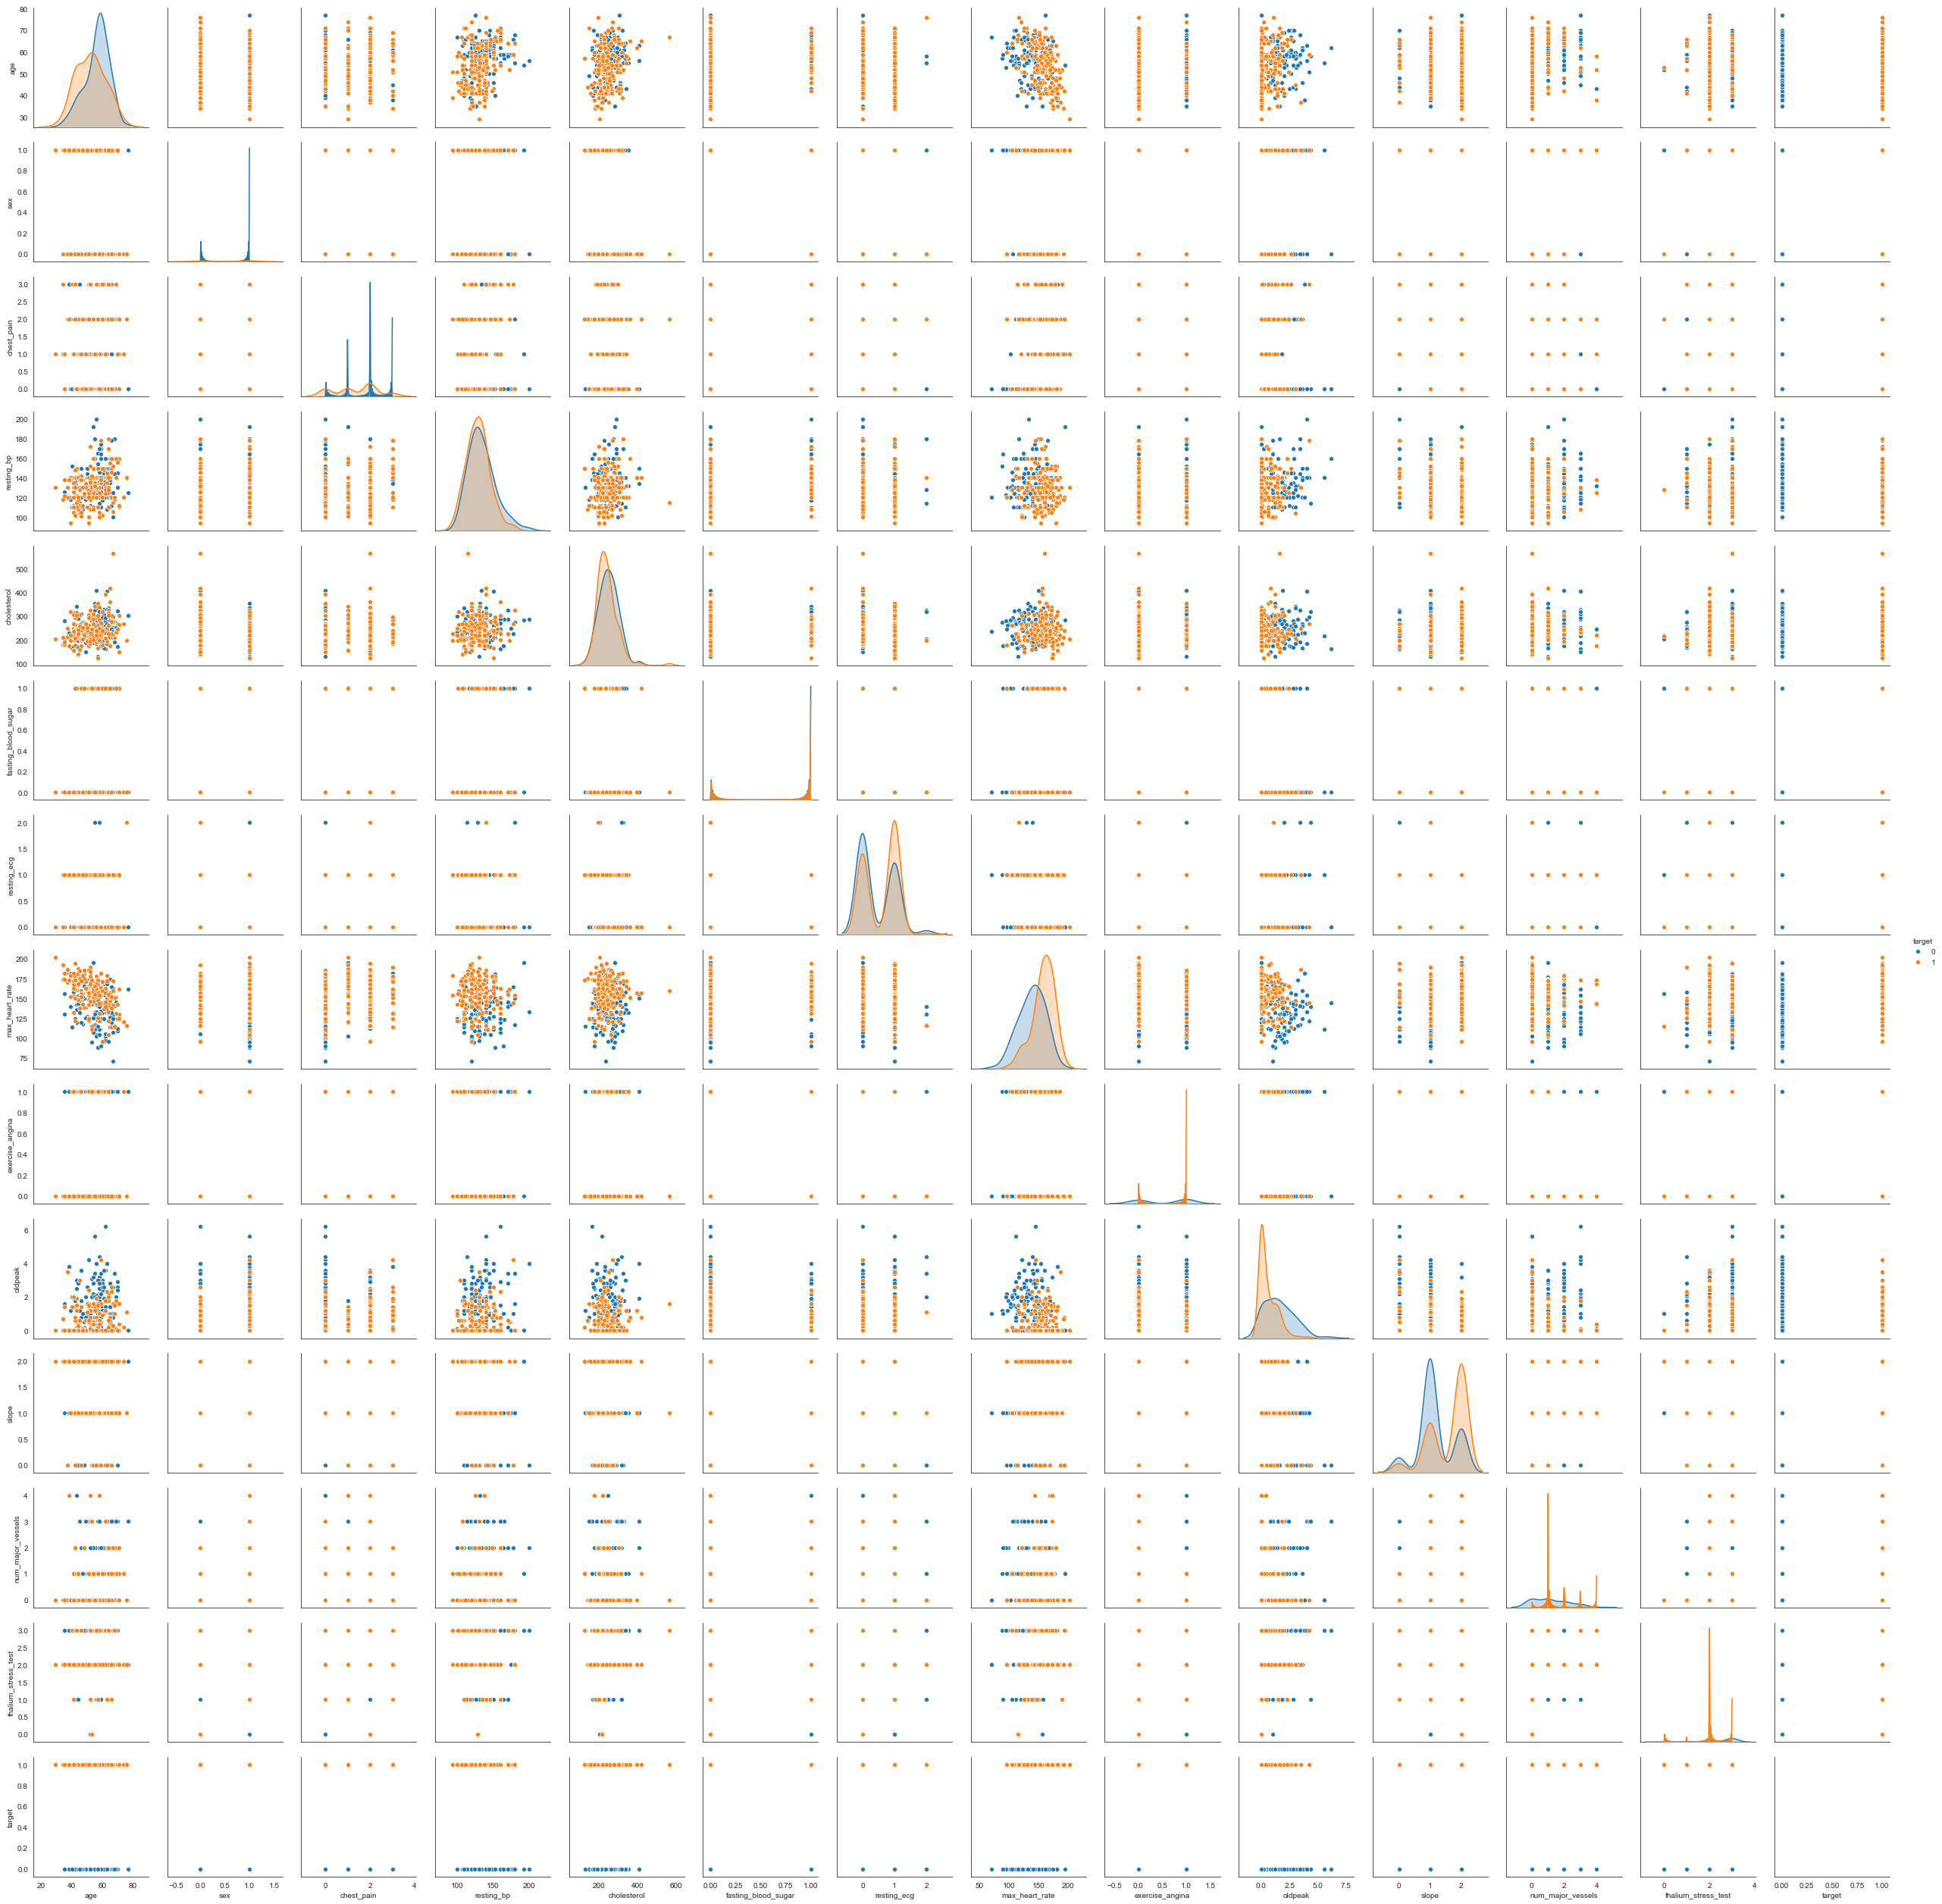

In [16]:
h = sns.pairplot(df, hue="target")

In [16]:
#Getting all the unique numerical variables
unique_vars=[]

print('all unique variables are:')
for var in df.columns:
    count=df[var].nunique()
    print(var, '----->',count)
    if count<10:
        unique_vars.append(var) 
unique_vars   

all unique variables are:
age -----> 41
sex -----> 2
chest_pain -----> 4
resting_bp -----> 49
cholesterol -----> 152
fasting_blood_sugar -----> 2
resting_ecg -----> 3
max_heart_rate -----> 91
exercise_angina -----> 2
oldpeak -----> 40
slope -----> 3
num_major_vessels -----> 5
thalium_stress_test -----> 4
target -----> 2


['sex',
 'chest_pain',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'slope',
 'num_major_vessels',
 'thalium_stress_test',
 'target']

In [17]:
#Changing the data type of variables that have less than 10 sub-attributes.
for var in unique_vars:
    print(var,'\n--------------------\n',df[var].value_counts(),'\n')

sex 
--------------------
 1    207
0     96
Name: sex, dtype: int64 

chest_pain 
--------------------
 0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64 

fasting_blood_sugar 
--------------------
 0    258
1     45
Name: fasting_blood_sugar, dtype: int64 

resting_ecg 
--------------------
 1    152
0    147
2      4
Name: resting_ecg, dtype: int64 

exercise_angina 
--------------------
 0    204
1     99
Name: exercise_angina, dtype: int64 

slope 
--------------------
 2    142
1    140
0     21
Name: slope, dtype: int64 

num_major_vessels 
--------------------
 0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64 

thalium_stress_test 
--------------------
 2    166
3    117
1     18
0      2
Name: thalium_stress_test, dtype: int64 

target 
--------------------
 1    165
0    138
Name: target, dtype: int64 



In [18]:
#change the data types for attributes less than 10 
df['sex'] = df['sex'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['exercise_angina'] = df['exercise_angina'].astype('object')
df['chest_pain'] = df['chest_pain'].astype('object')
df['resting_ecg'] = df['resting_ecg'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thalium_stress_test'] = df['thalium_stress_test'].astype('object')
df['num_major_vessels'] = df['num_major_vessels'].astype('object')
df['target'] = df['target'].astype('object')

#### Categorical data - ready to analyse with respect to the target variable

In [19]:
# select all categorical variables
categorical = df.select_dtypes(include=['object'])

#categorical = [var for var in df.columns if df[var].dtype=='O']
for cats in categorical:
    print('\n\n' +cats+'\n****************')
    print(df[cats].value_counts())



sex
****************
1    207
0     96
Name: sex, dtype: int64


chest_pain
****************
0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64


fasting_blood_sugar
****************
0    258
1     45
Name: fasting_blood_sugar, dtype: int64


resting_ecg
****************
1    152
0    147
2      4
Name: resting_ecg, dtype: int64


exercise_angina
****************
0    204
1     99
Name: exercise_angina, dtype: int64


slope
****************
2    142
1    140
0     21
Name: slope, dtype: int64


num_major_vessels
****************
0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64


thalium_stress_test
****************
2    166
3    117
1     18
0      2
Name: thalium_stress_test, dtype: int64


target
****************
1    165
0    138
Name: target, dtype: int64


#### Categorical Visulizations

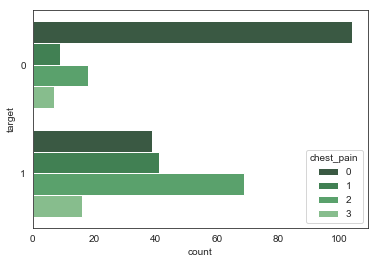

chest_pain    0   1   2   3
target                     
0           104   9  18   7
1            39  41  69  16


In [20]:
sns.countplot(y="target", hue="chest_pain", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['target'], df['chest_pain'])
print(counttable)

* highest HD accurance = chest pain of value 2

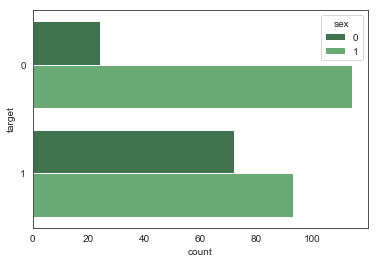

sex      0    1
target         
0       24  114
1       72   93


In [21]:
sns.countplot(y="target", hue="sex", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['target'], df['sex'])
print(counttable)

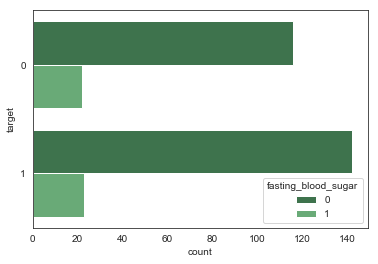

fasting_blood_sugar    0   1
target                      
0                    116  22
1                    142  23


In [22]:
sns.countplot(y="target", hue="fasting_blood_sugar", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['target'], df['fasting_blood_sugar'])
print(counttable)

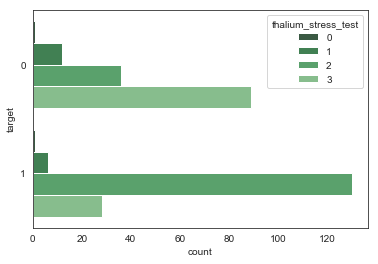

thalium_stress_test  0   1    2   3
target                             
0                    1  12   36  89
1                    1   6  130  28


In [23]:
sns.countplot(y="target", hue="thalium_stress_test", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['target'], df['thalium_stress_test'])
print(counttable)

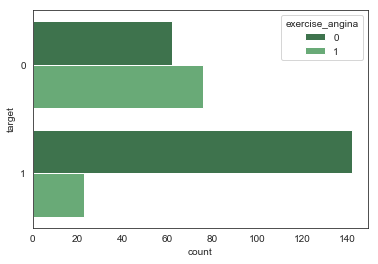

exercise_angina    0   1
target                  
0                 62  76
1                142  23


In [24]:
sns.countplot(y="target", hue="exercise_angina", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['target'], df['exercise_angina'])
print(counttable)

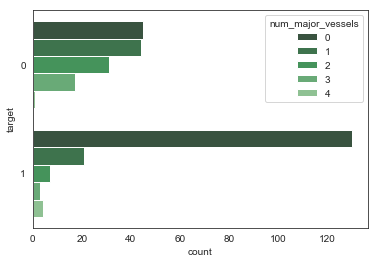

num_major_vessels    0   1   2   3  4
target                               
0                   45  44  31  17  1
1                  130  21   7   3  4


In [25]:
sns.countplot(y="target", hue="num_major_vessels", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['target'], df['num_major_vessels'])
print(counttable)

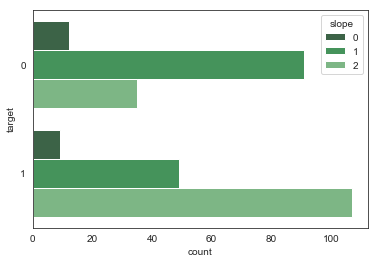

slope    0   1    2
target             
0       12  91   35
1        9  49  107


In [26]:
sns.countplot(y="target", hue="slope", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['target'], df['slope'])
print(counttable)

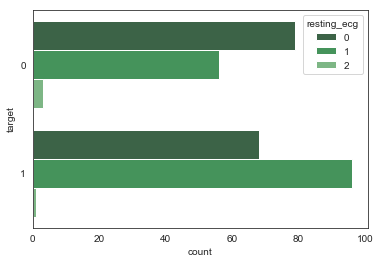

resting_ecg   0   1  2
target                
0            79  56  3
1            68  96  1


In [27]:
sns.countplot(y="target", hue="resting_ecg", data=df, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df['target'], df['resting_ecg'])
print(counttable)

In [28]:
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thalium_stress_test,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Numerical data

In [29]:
# age, resting_bp, cholesterol, max_heart_rate, oldpeak
numerical = [var for var in df.columns if df[var].dtype!='O']
#for nums in numerical:
#    print('\n\n' +nums+'\n****************')
#    print(df[nums].value_counts())

In [30]:
# Checking for outliers in the continuous variables
numerical_df = df[numerical]

# Checking outliers at 25%,50%,75%,90%,95% and 99%
numerical_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,age,resting_bp,cholesterol,max_heart_rate,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
90%,66.000000,152.000000,308.800000,176.600000,2.800000
95%,68.000000,160.000000,326.900000,181.900000,3.400000
99%,71.000000,180.000000,406.740000,191.960000,4.200000


#### Numerical Visulizations

''

<Figure size 1440x720 with 0 Axes>

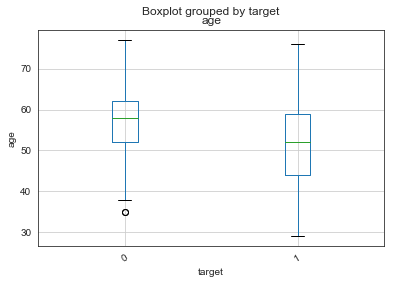

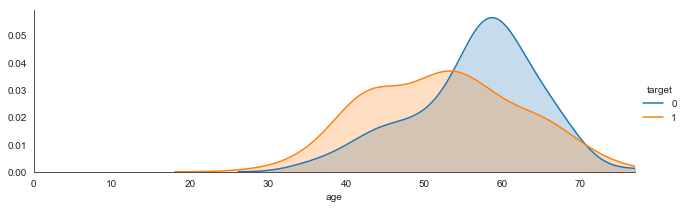

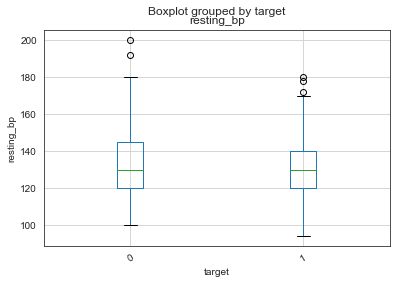

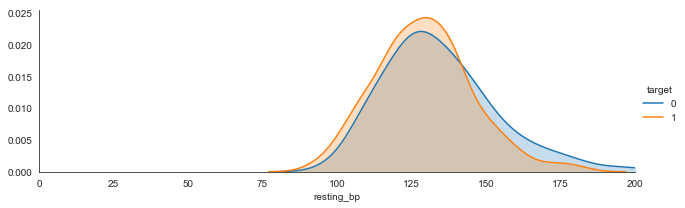

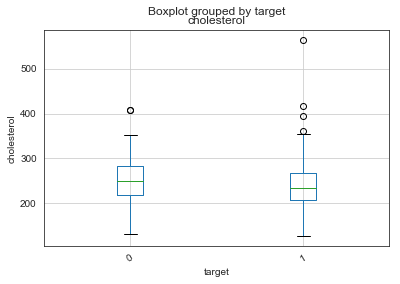

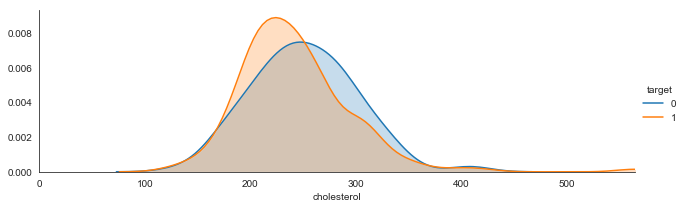

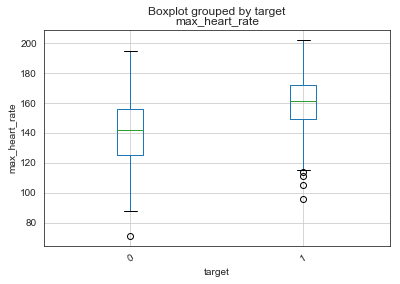

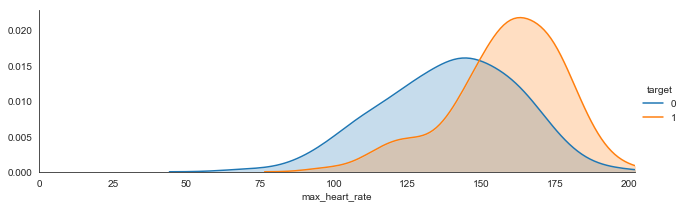

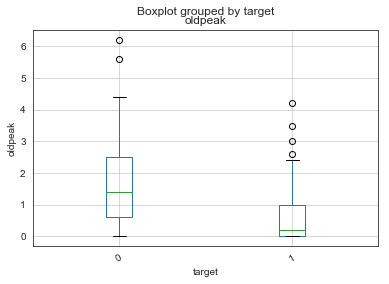

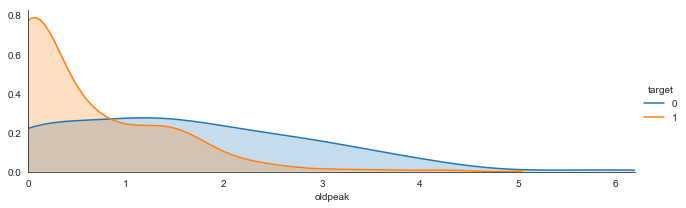

In [31]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20,10))

#plt.figure(figsize=(24,12))

for var in numerical:
    df.boxplot(column = var,by = 'target')
    plt.xticks(rotation=30)
    plt.xlabel('target')
    plt.ylabel(var)
    
    facet = sns.FacetGrid(df, hue = "target", aspect = 3)
    facet.map(sns.kdeplot,var,shade= True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
;

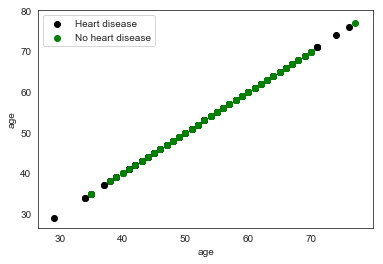

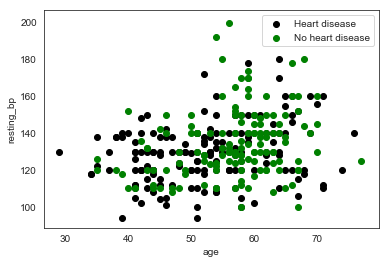

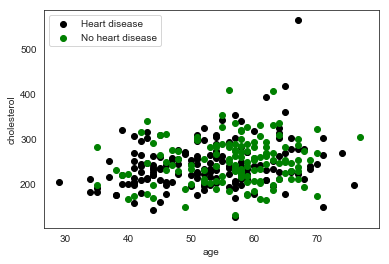

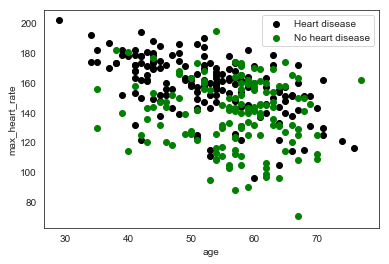

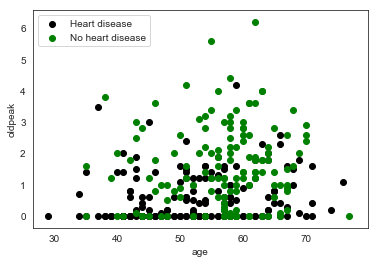

In [32]:
for var in numerical_df: 
    plt.scatter(x=df['age'][df.target==1], y=df[var][(df.target==1)], c="black")
    plt.scatter(x=df['age'][df.target==0], y=df[var][(df.target==0)], c="green")
    plt.legend(["Heart disease", "No heart disease"])
    plt.xlabel('age')
    plt.ylabel(var)
    plt.show()

In [33]:
#group the ages
plt.rcParams.update({'font.size': 15})
#agebins = [0,35, 40, 45,50, 55, 60,65, 70,95]
agebins = range(0,100,5)
df['binned_age'] = pd.cut(df['age'], agebins)
print('number of people per bin')
print('------------------------------')
print(df.groupby('age')['target'].count().reset_index())

number of people per bin
------------------------------
    age  target
0    29       1
1    34       2
2    35       4
3    37       2
4    38       3
5    39       4
6    40       3
7    41      10
8    42       8
9    43       8
10   44      11
11   45       8
12   46       7
13   47       5
14   48       7
15   49       5
16   50       7
17   51      12
18   52      13
19   53       8
20   54      16
21   55       8
22   56      11
23   57      17
24   58      19
25   59      14
26   60      11
27   61       8
28   62      11
29   63       9
30   64      10
31   65       8
32   66       7
33   67       9
34   68       4
35   69       3
36   70       4
37   71       3
38   74       1
39   76       1
40   77       1


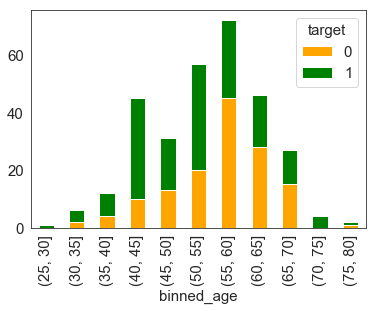

In [34]:
df_age = df.groupby(['binned_age','target'])['binned_age'].count().unstack('target').fillna(0)
df_age.plot(kind='bar', stacked=True, color=['orange', 'green'])

#### If we bin the age attribute, we can see the largest group with heart disease is between 45 and 55.

In [35]:
#t_bins = [35, 65, 95,125,155,185,215,245]
t_bins = range(35,240,10)
df['binned_heart_rate'] = pd.cut(df['max_heart_rate'], t_bins)

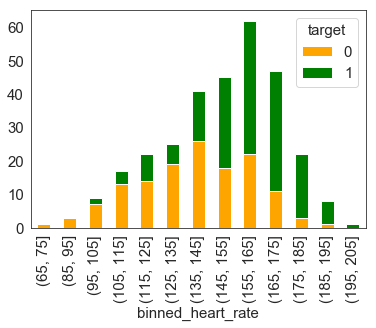

In [36]:
df_heart = df.groupby(['binned_heart_rate','target'])['binned_heart_rate'].count().unstack('target').fillna(0)
df_heart.plot(kind='bar', stacked=True, color=['orange', 'green'])

### The heart rate bewteen 145-175 has the highest heart rate.

In [37]:
c_bins = range(0,700,50)
df['binned_cholesterol'] = pd.cut(df['cholesterol'],c_bins)

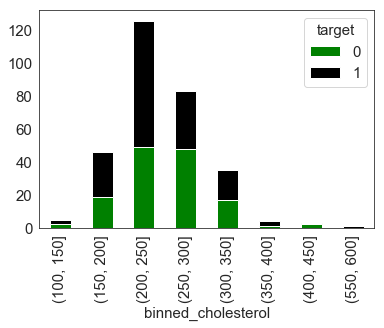

In [40]:
df_heart = df.groupby(['binned_cholesterol','target'])['binned_cholesterol'].count().unstack('target').fillna(0)
df_heart.plot(kind='bar', stacked=True, color=['green', 'black'])

### 200-250 is at hightest heart disease rate.

target,0,1
chest_pain,,
0,251.932692,245.333333
1,263.444444,240.682927
2,239.000000,244.260870
3,253.714286,229.875000


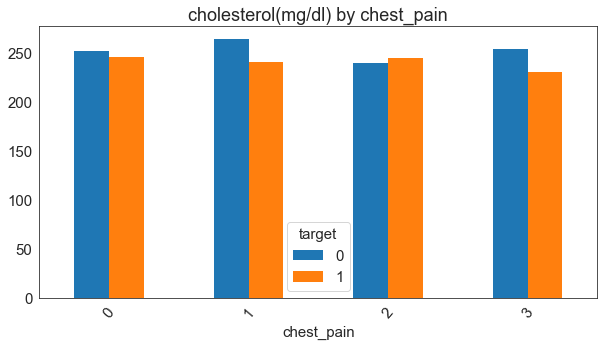

In [39]:
'''
Chest Pain Type (0-4)
0, Typical angina - Chest pain related decrease blood supply to the heart
1, Atypical angina - Chest pain not related to heart
2, Non-anginal pain - Typically esophageal spasms (non heart related)
3, Asymptomatic - Chest pain not showing signs of disease

cholestrol level (mg/dL)
Serum cholestrol level (mg/dL) above 200 is cause for concern
'''
cholest=df.pivot_table(index=('chest_pain'),columns='target', values=('cholesterol'), aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cholest.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('cholesterol(mg/dl) by chest_pain')
plt.xticks(rotation=50)
cholest

### When chest pain is zero(the worset value), there is a higher chance of having heart disease.

target,0,1
binned_age,,
"(25, 30]",NaN,204.000000
"(30, 35]",240.000000,191.750000
"(35, 40]",210.000000,219.250000
"(40, 45]",248.100000,233.371429
"(45, 50]",237.000000,236.166667
"(50, 55]",257.350000,245.675676
"(55, 60]",253.000000,237.703704
"(60, 65]",258.678571,268.333333
"(65, 70]",245.933333,275.333333


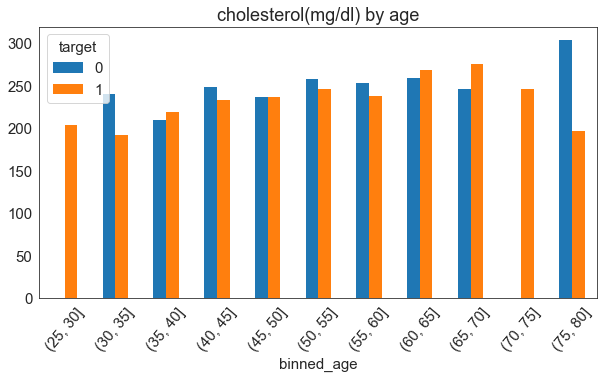

In [45]:
cholest1=df.pivot_table(index=('binned_age'),columns='target', values=('cholesterol'), aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cholest1.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('cholesterol(mg/dl) by age')
plt.xticks(rotation=50)
cholest1

target,0,1
sex,,
0,146.125000,128.736111
1,131.929825,129.741935


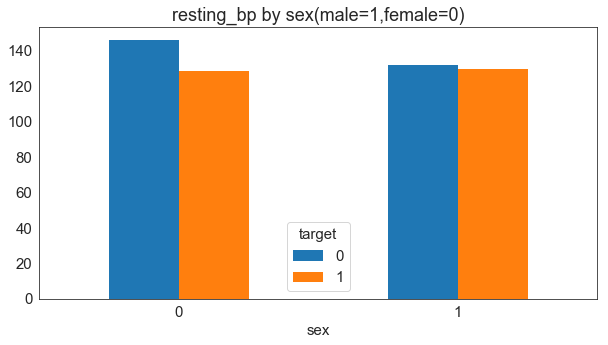

In [46]:
#resting_bp 
bps=df.pivot_table(index=('sex'),columns='target', values=('resting_bp'), aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
bps.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('resting_bp by sex(male=1,female=0)')
plt.xticks(rotation=360)
bps

target                   0           1
binned_age sex                        
(25, 30]   1           NaN  130.000000
(30, 35]   0           NaN  128.000000
           1    123.000000  120.000000
(35, 40]   0           NaN  117.333333
           1    125.000000  137.200000
(40, 45]   0    132.000000  118.583333
           1    121.333333  125.086957
(45, 50]   0           NaN  125.444444
           1    128.000000  124.000000
(50, 55]   0    146.000000  131.000000
           1    132.117647  127.782609
(55, 60]   0    154.250000  126.000000
           1    134.756757  134.294118
(60, 65]   0    138.636364  144.400000
           1    131.352941  135.125000
(65, 70]   0    178.000000  132.714286
           1    139.142857  142.800000
(70, 75]   0           NaN  125.500000
(75, 80]   0           NaN  140.000000
           1    125.000000         NaN

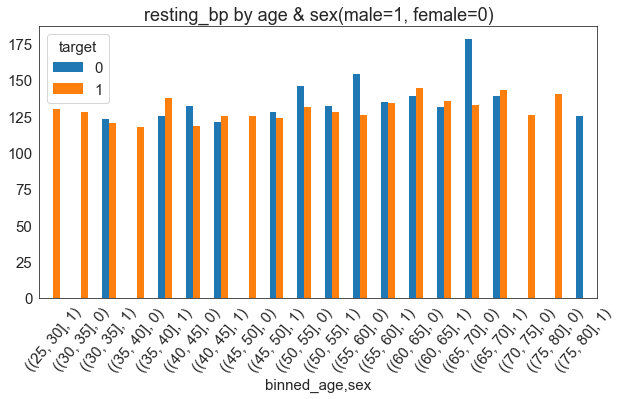

In [47]:
#resting_bp 
bps1=df.pivot_table(index=('binned_age','sex'),columns='target', values=('resting_bp'), aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
bps1.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('resting_bp by age & sex(male=1, female=0)')
plt.xticks(rotation=50)
bps1

target,0,1
sex,,
0,142.416667,154.027778
1,138.403509,161.903226


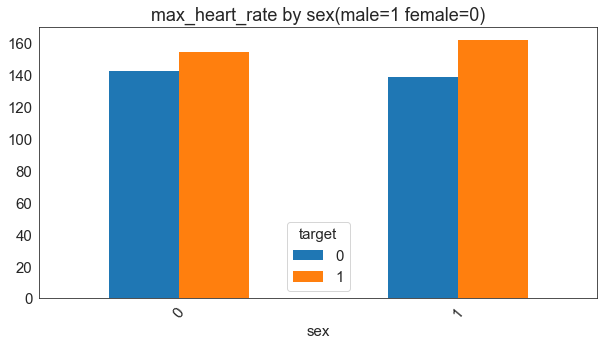

In [48]:
thalacha=df.pivot_table(index=('sex'),columns='target', values=('max_heart_rate'), aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
thalacha.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('max_heart_rate by sex(male=1 female=0)')
plt.xticks(rotation=50)
thalacha

target                   0           1
binned_age sex                        
(25, 30]   1           NaN  202.000000
(30, 35]   0           NaN  187.000000
           1    143.000000  174.000000
(35, 40]   0           NaN  167.000000
           1    154.250000  178.600000
(40, 45]   0    136.000000  160.333333
           1    144.333333  170.130435
(45, 50]   0           NaN  158.555556
           1    142.076923  167.666667
(50, 55]   0    129.666667  155.642857
           1    137.941176  157.739130
(55, 60]   0    147.250000  148.900000
           1    138.675676  160.764706
(60, 65]   0    140.909091  153.600000
           1    135.882353  139.625000
(65, 70]   0    165.000000  143.714286
           1    127.214286  142.800000
(70, 75]   0           NaN  134.500000
(75, 80]   0           NaN  116.000000
           1    162.000000         NaN

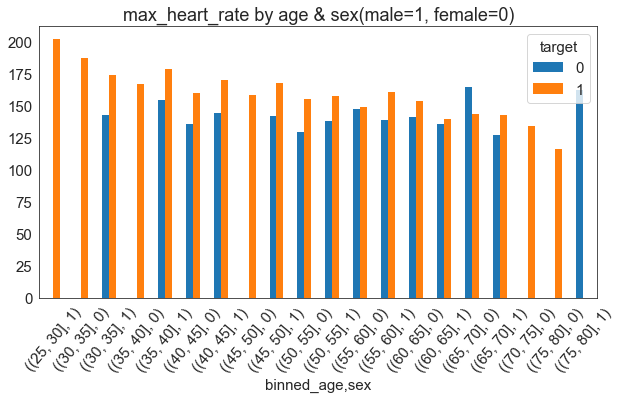

In [49]:
thalach=df.pivot_table(index=('binned_age','sex'),columns='target', values=('max_heart_rate'), aggfunc='mean')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
thalach.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('max_heart_rate by age & sex(male=1, female=0)')
plt.xticks(rotation=50)
thalach

### It looks like between the ages of 25-45 the max heart rate is high and they have heart disease, however, when looking at the box plot earlier for the heart rate there were several ouliers.  This will be checked further, by grouping the heart rate to see if the outcome will be different.

In [50]:
plt.rcParams.update({'font.size': 15})
t_bins = [0, 35, 65, 95,125,155,185,215,245]
df['binned_heart_rate'] = pd.cut(df['max_heart_rate'], t_bins)

target                         0          1
binned_heart_rate sex                      
(65, 95]          1    59.000000        NaN
(95, 125]         0    60.200000  63.200000
                  1    57.137931  54.750000
(125, 155]        0    57.461538  56.157895
                  1    56.020000  57.068966
(155, 185]        0    61.500000  52.261905
                  1    54.866667  48.245283
(185, 215]        0          NaN  34.000000
                  1    54.000000  43.285714

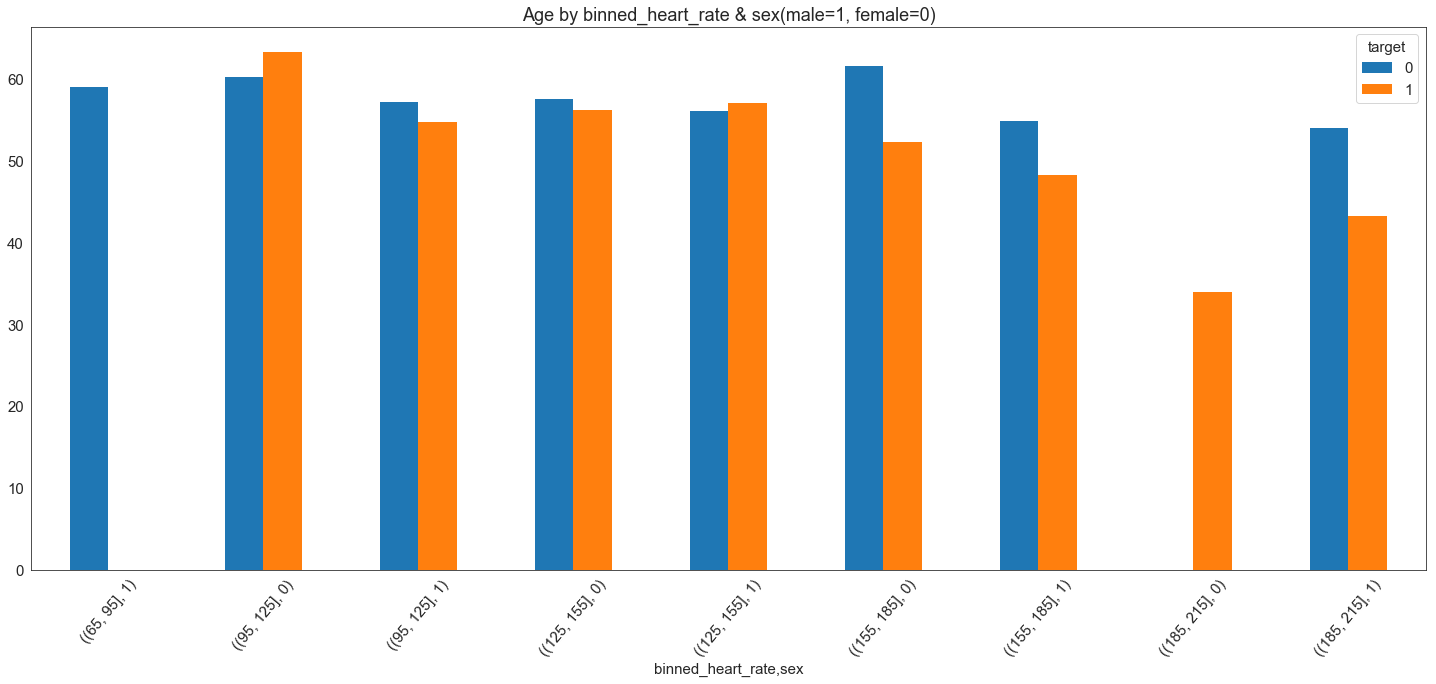

In [51]:
thalach1=df.pivot_table(index=('binned_heart_rate','sex'),columns='target',values=('age'), aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
thalach1.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('Age by binned_heart_rate & sex(male=1, female=0)')
plt.xticks(rotation=50)
thalach1

####  95-125 has the highest rate of heart disease.

target                                0          1
binned_heart_rate chest_pain                      
(65, 95]          0           59.000000        NaN
(95, 125]         0           56.517241  58.666667
                  1           64.000000  74.000000
                  2           66.000000  61.600000
                  3           59.000000  58.500000
(125, 155]        0           56.085106  56.285714
                  1           57.500000  53.500000
                  2           57.583333  55.900000
                  3           53.000000  64.666667
(155, 185]        0           56.000000  51.176471
                  1           55.000000  49.724138
                  2           57.500000  49.952381
                  3           55.250000  48.857143
(185, 215]        0                 NaN  49.500000
                  1           54.000000  35.666667
                  2                 NaN  39.500000
                  3                 NaN  52.000000

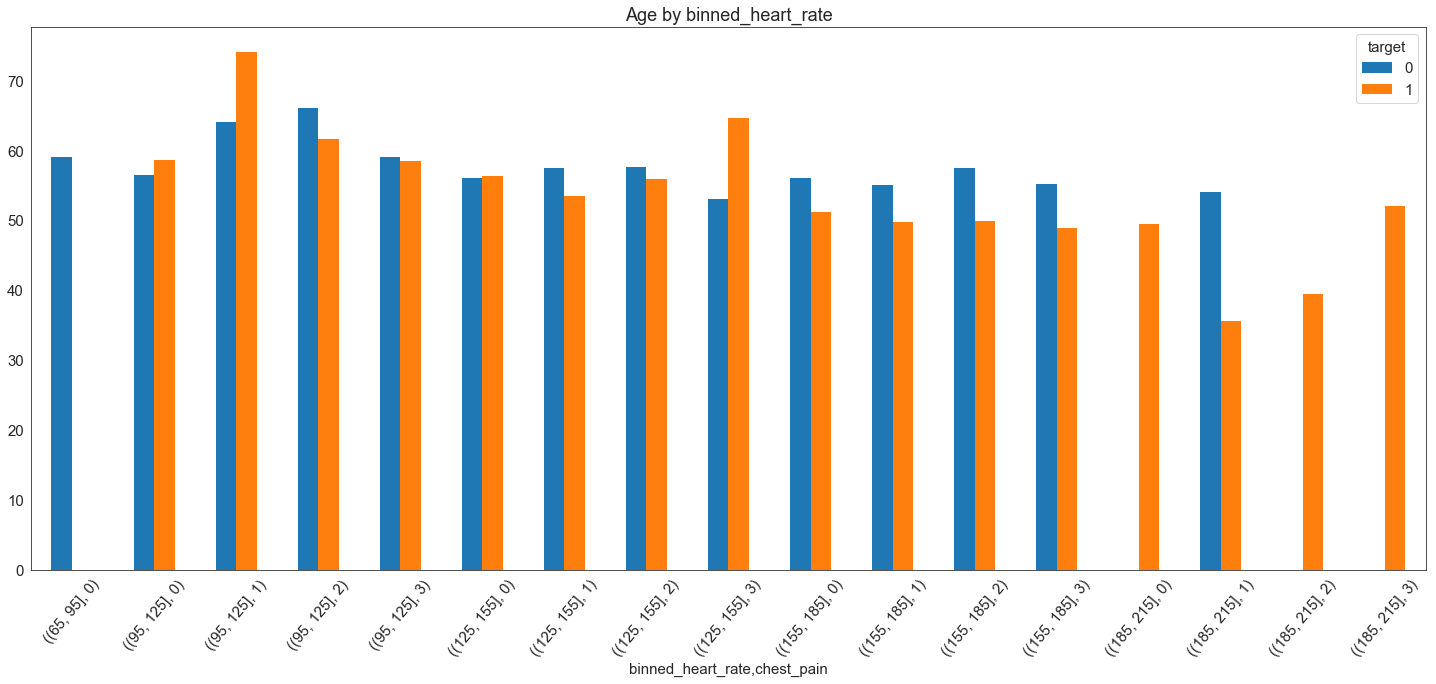

In [52]:
thalach2=df.pivot_table(index=('binned_heart_rate','chest_pain'),columns=('target'),values=('age'), aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
thalach2.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('Age by binned_heart_rate')
plt.xticks(rotation=50)
thalach2

target                                         0          1
binned_heart_rate fasting_blood_sugar                      
(65, 95]          0                    59.000000        NaN
                  1                    59.000000        NaN
(95, 125]         0                    57.516129  60.846154
                  1                    58.333333  60.000000
(125, 155]        0                    56.380000  55.878049
                  1                    56.076923  61.571429
(155, 185]        0                    55.000000  49.296296
                  1                    62.000000  54.214286
(185, 215]        0                    54.000000  42.142857
                  1                          NaN  42.000000

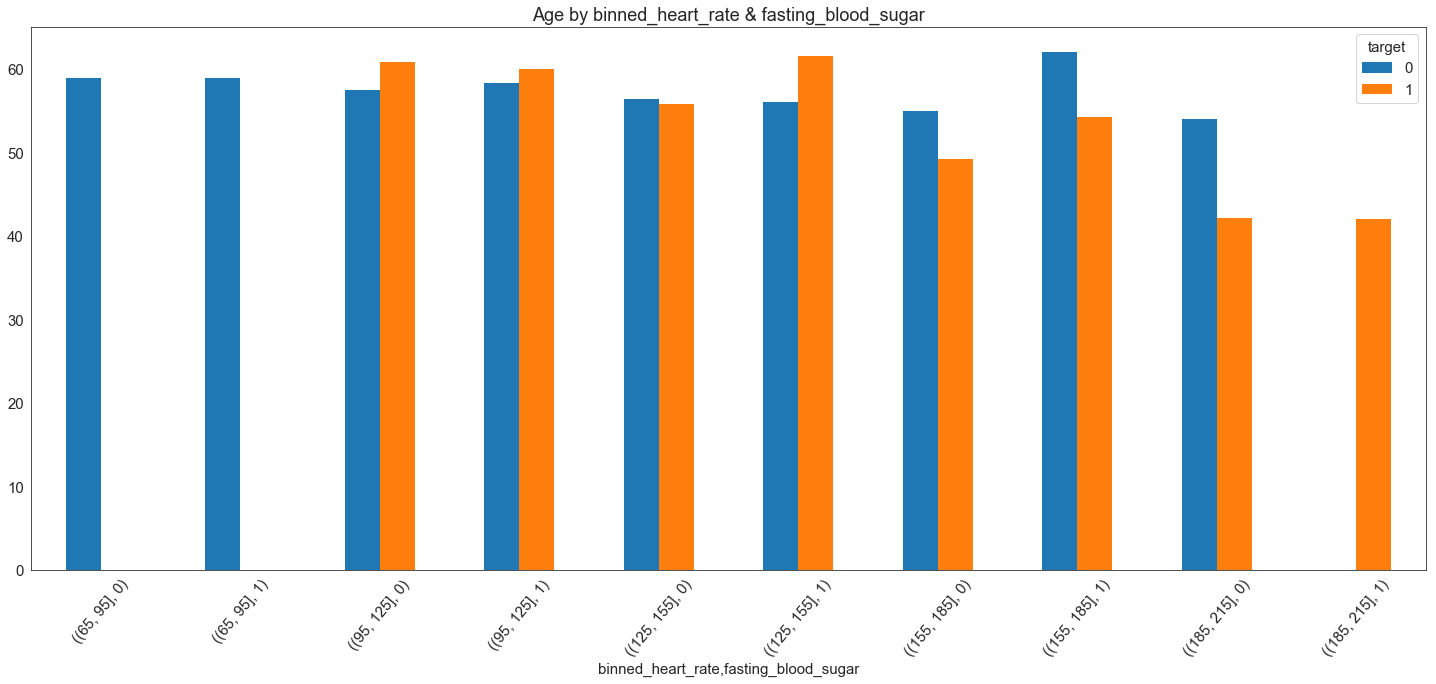

In [53]:
thalach3=df.pivot_table(index=('binned_heart_rate','fasting_blood_sugar'),columns=('target'),values=('age'), aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
thalach3.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('Age by binned_heart_rate & fasting_blood_sugar')
plt.xticks(rotation=50)
thalach3

target                          0           1
chest_pain binned_age                        
0          (30, 35]    143.000000  182.000000
           (35, 40]    145.000000         NaN
           (40, 45]    144.777778  162.250000
           (45, 50]    136.000000  160.600000
           (50, 55]    133.631579  151.166667
           (55, 60]    133.967742  151.111111
           (60, 65]    138.727273  140.166667
           (65, 70]    126.800000  143.666667
           (70, 75]           NaN  125.000000
           (75, 80]    162.000000         NaN
1          (30, 35]           NaN  183.000000
           (40, 45]           NaN  165.076923
           (45, 50]    168.000000  167.166667
           (50, 55]    195.000000  163.875000
           (55, 60]    158.200000  161.833333
           (60, 65]    103.000000  159.500000
           (65, 70]    120.000000  143.000000
           (70, 75]           NaN  141.500000
           (25, 30]           NaN  202.000000
2          (35, 40]           NaN  173.714286
           (40, 45]           NaN  170.384615
           (45, 50]    145.400000  161.428571
           (50, 55]           NaN  154.800000
           (55, 60]    153.166667  156.375000
           (60, 65]    128.666667  149.142857
           (65, 70]    139.500000  150.000000
           (70, 75]           NaN  130.000000
           (75, 80]           NaN  116.000000
3          (30, 35]           NaN  174.000000
           (35, 40]    182.000000  178.000000
           (40, 45]    132.000000  178.000000
           (50, 55]           NaN  164.333333
           (55, 60]    148.666667  160.000000
           (60, 65]    159.500000  149.666667
           (65, 70]           NaN  132.000000

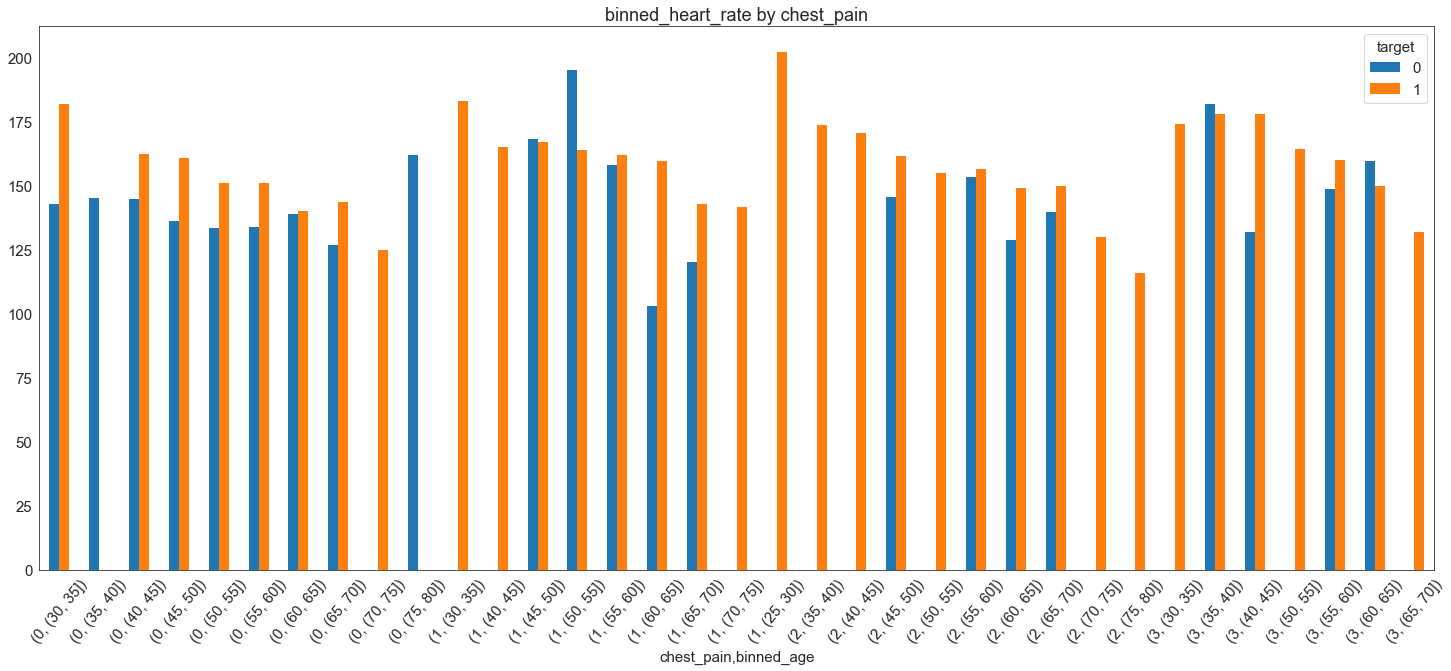

In [54]:
#heart rate and exercise
'''
chest pain
0, Typical angina - Chest pain related decrease blood supply to the heart
1, Atypical angina - Chest pain not related to heart
2, Non-anginal pain - Typically esophageal spasms (non heart related)
3, Asymptomatic - Chest pain not showing signs of disease


max heart rate
Maximum heart rate achieved Rate above 100 is cause for concern
'''
heart_rate=df.pivot_table(index=('chest_pain','binned_age'),columns=('target'),values=('max_heart_rate'), aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
heart_rate.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('binned_heart_rate by chest_pain')
plt.xticks(rotation=50)
heart_rate

### Looking at this chest pain it seems this might be an important variable for prediction.  

target                        0         1
chest_pain binned_age                    
0          (30, 35]    0.800000  1.400000
           (35, 40]    1.066667       NaN
           (40, 45]    1.133333  0.812500
           (45, 50]    1.085714  0.020000
           (50, 55]    1.931579  0.283333
           (55, 60]    1.725806  0.511111
           (60, 65]    2.118182  0.633333
           (65, 70]    1.570000  1.000000
           (70, 75]         NaN  1.600000
           (75, 80]    0.000000       NaN
1          (30, 35]         NaN  0.350000
           (40, 45]         NaN  0.153846
           (45, 50]    1.000000  0.316667
           (50, 55]    0.000000  0.450000
           (55, 60]    0.420000  0.416667
           (60, 65]    1.400000  0.000000
           (65, 70]    0.000000  0.000000
           (70, 75]         NaN  0.300000
           (25, 30]         NaN  0.000000
2          (35, 40]         NaN  0.500000
           (40, 45]         NaN  0.476923
           (45, 50]    1.400000  0.457143
           (50, 55]         NaN  0.635000
           (55, 60]    1.983333  0.500000
           (60, 65]    1.000000  0.771429
           (65, 70]    1.825000  0.820000
           (70, 75]         NaN  0.000000
           (75, 80]         NaN  1.100000
3          (30, 35]         NaN  0.000000
           (35, 40]    3.800000  1.400000
           (40, 45]    1.200000  0.800000
           (50, 55]         NaN  0.866667
           (55, 60]    0.333333  2.000000
           (60, 65]    2.000000  1.566667
           (65, 70]         NaN  1.500000

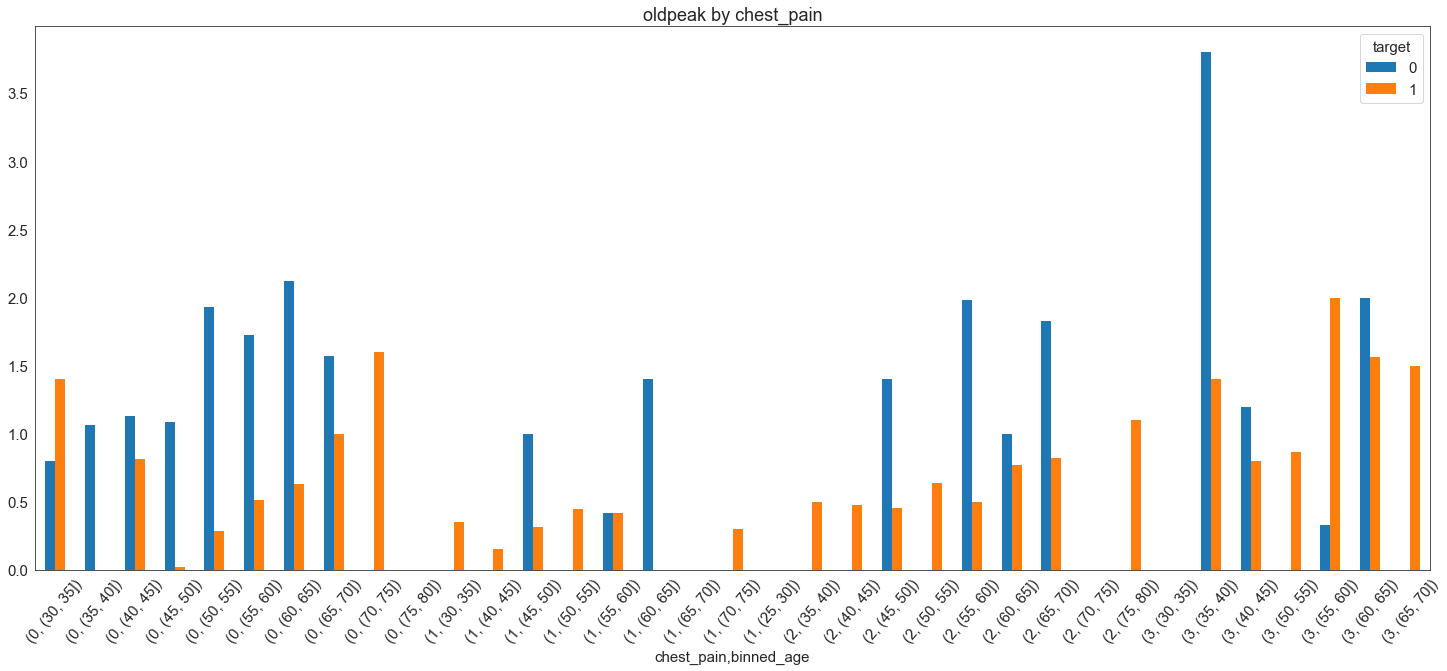

In [55]:
'''
oldpeak: ST depression induced by exercise relative to rest 
Looks at stress of heart during excercise Unhealthy heart will stress more
'''
z=df.pivot_table(index=('chest_pain','binned_age'),columns=('target'),values=('oldpeak'), aggfunc='mean')

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
z.plot(kind='bar', 
        align='center', width=.5, edgecolor='none' 
       , ax=ax)

plt.title('oldpeak by chest_pain')
plt.xticks(rotation=50)
z

#### this doesn't look to be like a strong feature for prediction

In [56]:
#Save the cleaned dataframe for other models
dff=df
df.to_csv('cleaned_heart_data.csv')

In [57]:
dff.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thalium_stress_test,target,binned_age,binned_heart_rate,binned_cholesterol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 65]","(125, 155]","(200, 250]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(35, 40]","(185, 215]","(200, 250]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 45]","(155, 185]","(200, 250]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(55, 60]","(155, 185]","(200, 250]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(55, 60]","(155, 185]","(350, 400]"


In [67]:
#df['sex'] = df['sex'].astype('int')
dff['fasting_blood_sugar'] = dff['fasting_blood_sugar'].astype('int')
dff['exercise_angina'] = dff['exercise_angina'].astype('int')
dff['chest_pain'] = dff['chest_pain'].astype('int')
dff['resting_ecg'] = dff['resting_ecg'].astype('int')
dff['slope'] = dff['slope'].astype('int')
dff['num_major_vessels'] = dff['num_major_vessels'].astype('int')
dff['thalium_stress_test'] = dff['thalium_stress_test'].astype('int')
dff['target']=dff['target'].astype('int')
dff['sex'].replace(['Female','Male'],[0,1],inplace=True)

In [68]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
age                    303 non-null int64
sex                    303 non-null int64
chest_pain             303 non-null int64
resting_bp             303 non-null int64
cholesterol            303 non-null int64
fasting_blood_sugar    303 non-null int64
resting_ecg            303 non-null int64
max_heart_rate         303 non-null int64
exercise_angina        303 non-null int64
oldpeak                303 non-null float64
slope                  303 non-null int64
num_major_vessels      303 non-null int64
thalium_stress_test    303 non-null int64
target                 303 non-null int64
binned_age             303 non-null category
binned_heart_rate      303 non-null category
binned_cholesterol     302 non-null category
dtypes: category(3), float64(1), int64(13)
memory usage: 34.7 KB


In [69]:
#dff.drop(columns=['binned_age','binned_heart_rate','chest_pain','resting_ecg',
#                 'slope','num_major_vessels','age','cholesterol'],inplace=True)

dff.drop(columns=['binned_age','binned_heart_rate','binned_cholesterol'],inplace=True)

In [70]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                    303 non-null int64
sex                    303 non-null int64
chest_pain             303 non-null int64
resting_bp             303 non-null int64
cholesterol            303 non-null int64
fasting_blood_sugar    303 non-null int64
resting_ecg            303 non-null int64
max_heart_rate         303 non-null int64
exercise_angina        303 non-null int64
oldpeak                303 non-null float64
slope                  303 non-null int64
num_major_vessels      303 non-null int64
thalium_stress_test    303 non-null int64
target                 303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### What is the baseline of the data?

In [71]:
target = (sum(dff['target'])/len(dff['target'].index))*100
print('My baseline : {:.2f}%'.format(target))

My baseline : 54.46%


1    165
0    138
Name: target, dtype: int64


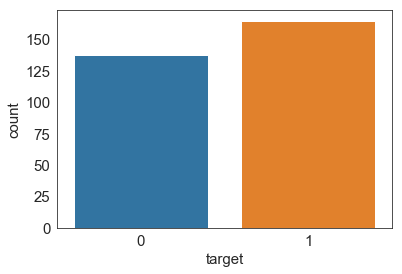

In [83]:
#baseline 165/(165+138) - if predict all ones
heart = dff["target"]
sns.countplot(heart)
heart_temp = dff.target.value_counts()
print(heart_temp)

#### The current data has a predictive rate of 54%.  We will run several models to beat this baseline.

--------------

## split the data into train and test for the models:

    1.) Naive Bayes
    2.) KNN
    3.) Logistic Regression
    4.) Random Forest
    5.) Random Forest with XGB
    6.) Random Forest with Adaboost

In [74]:
df_x = dff.drop("target",axis=1)
df_y = dff["target"]

df_x.to_csv('X_train.csv')
df_y.to_csv('y_train.csv')


------------

### The target data is balanced.  The outliers are minimal. All the data is numerical so there is no need for one hot coding or PCA.  The variables are not correlated.